# Certified Data Scientist - Project
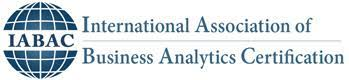

<h><font size="5"> <b>INX Future Inc Employee Performance - Project</b>
<hr>
<h><font size="5"><b> Submitted By: Aryan Abhi</b>
    

<hr>
<h><font size = "5"><b>Analysis:</b>
<hr>
<h><font size = "3"> The data is supervised and categorical. The predictor variables are ordinal and a few among them are nominal. The target variable <b>'Performance Rating'</b> is ordinal.
To analyze the data, various data processing techniques like Label Encoding and Standardization is used. Correlation Coeffecient is used to interpret the relationship between variables. The most important features selected are <b><font size ="4">'EmpLastSalaryHikePercent','YearsSinceLastPromotion','ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','EmpEnvironmentSatisfaction','YearsWithCurrManager','EmpDepartment','TotalWorkExperienceInYears','EmpJobRole','DistanceFromHome','EmpHourlyRate'.</b> For training the data and predicting the target, algorithms used are <b><font size ="4"> Random Forest, Logistic Regression, Decision Tree, xgboost, Extra Trees, Gradient Boosting, Lightgbm.</b>
- <font size = "3"> A separate analysis of Department wise Performance is carried out.
    
<hr>  
<h><font size = "5"><b> Summary:</b>
<hr>
<h><font size = "3"> The project was done with the purpose of finding out factors which affected the Performance of the employees, training a model which accurately predicts the Performance Rating of the employee, analyzing the data to provide recommendations to improve the performance and gain insights from the analysis. 
    
<h><font size = "4">The following steps were carried out:
- <h><font size = "3"> Import the data provided, find out the predictor & target variables and look for missing values.
- <h><font size = "3"> Analysis of Department wise performance as asked.
- <h><font size = "3"> Label Encoding the ordinal columns.
- <h><font size = "3"> Calculate correlation coeffecient to find out the relationship between variables.
- <h><font size = "3"> Standardizing the data and splitting it into test and train.
- <h><font size = "3">  Training the model without features selaction using algorithms like <b><font size ="4"> Random Forest, Logistic Regression, Decision Tree, xgboost, Extra Trees, Gradient Boosting, Lightgbm.</b> and checking the accuracy to find out which algorithm is the best.
- <h><font size = "3"> Features analysis for selaction and selected only those which has more than 10.
- <h><font size = "3">  Training the model without features selaction using algorithms like <b><font size ="4"> Random Forest, Logistic Regression, Decision Tree, xgboost, Extra Trees, Gradient Boosting, Lightgbm.</b> and checking the accuracy to find out which algorithm is the best.
Exporting the model with highest accuracy.
<hr>     
<h><font size = "5"><b> Results:</b>
<hr>
<h><font size = "3"> <b><font size ="4">Random Forest gives 91%(Without Feature Selection), 94%(with selected features) accuracy</b> I get. The features that are positively correlated are <b><font size ="4">Environment Satisfaction, Last Salary Hike Percent & Worklife Balance</b>. This means that if these factors increases, Performance Rating will increase. On the other hand, the features that are negatively correlated are Years Since Last Promotion, Experience Years at this Company, Experience years in Current Role & Years with Current Manager. This means that if these factors increases, Performance Rating will go down.
<hr>
<h><font size = "4"> <b> The top 3 features effecting employee performances According to correlation and and Score Value are:</b>   
- <h><font size = "3"> Employee Environment Satisfaction (Score: 110.691319)
- <h><font size = "3"> Employee Last Salary Hike Percent (Score: 297.136917)
- <h><font size = "3"> Years since last promotion (Score: 238.004284)
        
<hr>
<h><font size = "5"><b> Analysis and Insights:</b>
<hr>
- <h><font size = "3"> It was observed that the maximum accuracy was obtained when we used Random Forest which was 94%.
<b> <font size = "4"> I Choose Random Forest Not because only Accuracy, Because Its has very balanced Recall score, Precision Score, f1 Score in compare to other algorithm.</b> 
The important features that are positively correlated are Environment Satisfaction, Last Salary Hike Percent & Worklife Balance. This means that if these factors increases, Performance Rating will increase. On the other hand, the features that are negatively correlated are Years Since Last Promotion, Experience Years at this Company, Experience years in current role & Years with Current Manager. This means that if these factors increases, Performance Rating will go down.
We can conclude that the company should provide a better environment as it increases the performance drastically. The company should increase the salary of the employee from time to time and help them maintain a worklife balance. On the other hand, shuffling the manager from time to time will also affect performance.

<hr>
<h><font size = "5"><b> Recommendation:</b> 
<hr>
<h><font size = "3"> From the results, we can conclude that the company should provide a better environment as it increases the performance. The company should increase the salary of the employee from time to time and help them maintain a worklife balance. On the other hand, shuffling the manager from time to time will also affect performance.

# Importing The All Ncessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import  recall_score, precision_score, f1_score
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
from pycaret.classification import *
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier


from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
import joblib

import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
import cufflinks as cf
import plotly as py
py.offline.init_notebook_mode(connected=True)
init_notebook_mode(connected=True)
cf.go_offline()

import warnings 
warnings.filterwarnings('ignore')

# Load Data

In [2]:
df=pd.read_csv("INX_Future_Inc_Employee_Performance_V1.8.csv")

In [3]:
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3


In [4]:
df.drop(['EmpNumber'], axis=1, inplace=True)

In [5]:
data=df.copy()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Age                           1200 non-null   int64 
 1   Gender                        1200 non-null   object
 2   EducationBackground           1200 non-null   object
 3   MaritalStatus                 1200 non-null   object
 4   EmpDepartment                 1200 non-null   object
 5   EmpJobRole                    1200 non-null   object
 6   BusinessTravelFrequency       1200 non-null   object
 7   DistanceFromHome              1200 non-null   int64 
 8   EmpEducationLevel             1200 non-null   int64 
 9   EmpEnvironmentSatisfaction    1200 non-null   int64 
 10  EmpHourlyRate                 1200 non-null   int64 
 11  EmpJobInvolvement             1200 non-null   int64 
 12  EmpJobLevel                   1200 non-null   int64 
 13  EmpJobSatisfaction

# Exploratory Data Analysis/ Data Processing

In [7]:
data.columns

Index(['Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

<AxesSubplot:>

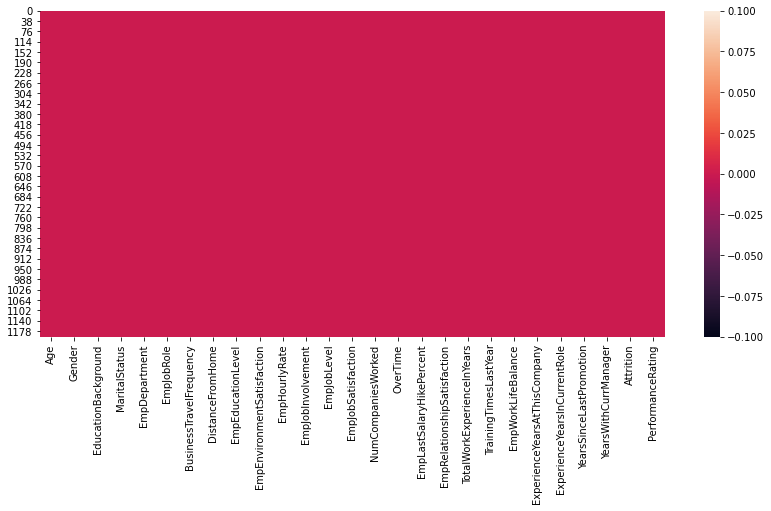

In [8]:
fig=plt.figure(figsize=(14,6))
sns.heatmap(data.isnull())

-<h><font size = "4"> This the the heatmap of all the features, We see there is no color disturbance. i.e: There is no missing value in our datasets

In [9]:
for col in data.select_dtypes('object').columns:
    print('No of unique {} \n {} \t column : {}'
          .format(len(data[col].unique()),col,data[col].unique()))
    print("*"*30)

No of unique 2 
 Gender 	 column : ['Male' 'Female']
******************************
No of unique 6 
 EducationBackground 	 column : ['Marketing' 'Life Sciences' 'Human Resources' 'Medical' 'Other'
 'Technical Degree']
******************************
No of unique 3 
 MaritalStatus 	 column : ['Single' 'Married' 'Divorced']
******************************
No of unique 6 
 EmpDepartment 	 column : ['Sales' 'Human Resources' 'Development' 'Data Science'
 'Research & Development' 'Finance']
******************************
No of unique 19 
 EmpJobRole 	 column : ['Sales Executive' 'Manager' 'Developer' 'Sales Representative'
 'Human Resources' 'Senior Developer' 'Data Scientist'
 'Senior Manager R&D' 'Laboratory Technician' 'Manufacturing Director'
 'Research Scientist' 'Healthcare Representative' 'Research Director'
 'Manager R&D' 'Finance Manager' 'Technical Architect' 'Business Analyst'
 'Technical Lead' 'Delivery Manager']
******************************
No of unique 3 
 BusinessTravelFreque

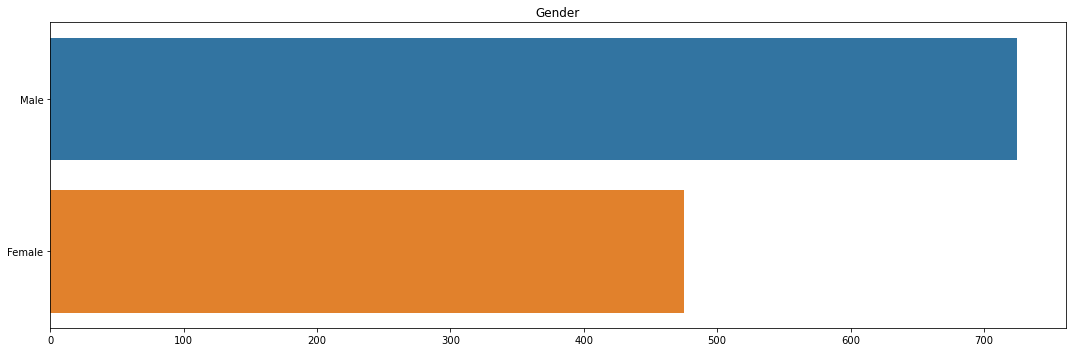

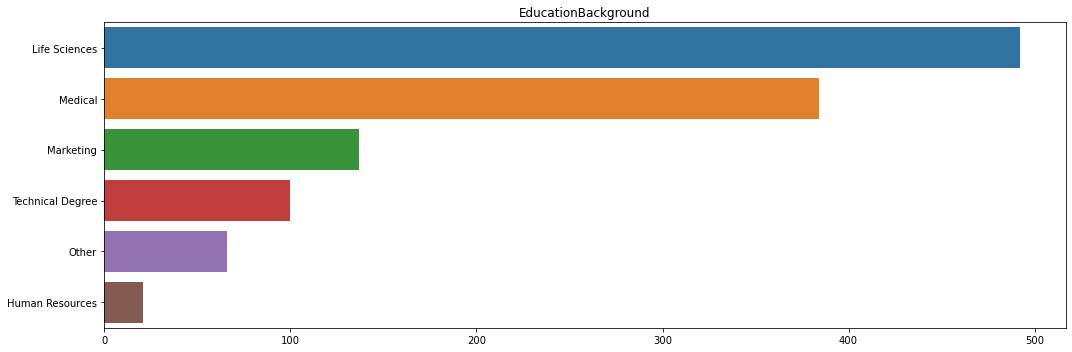

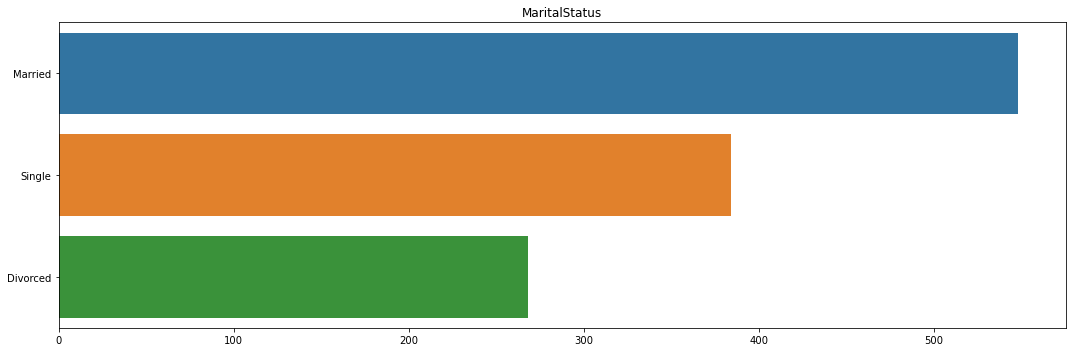

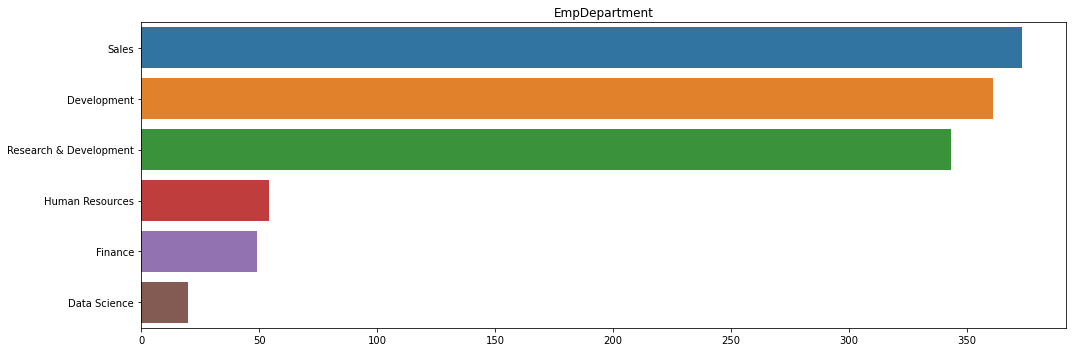

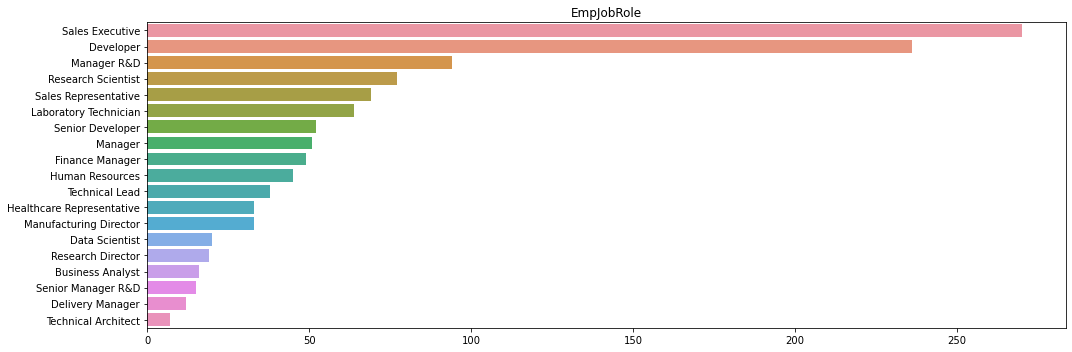

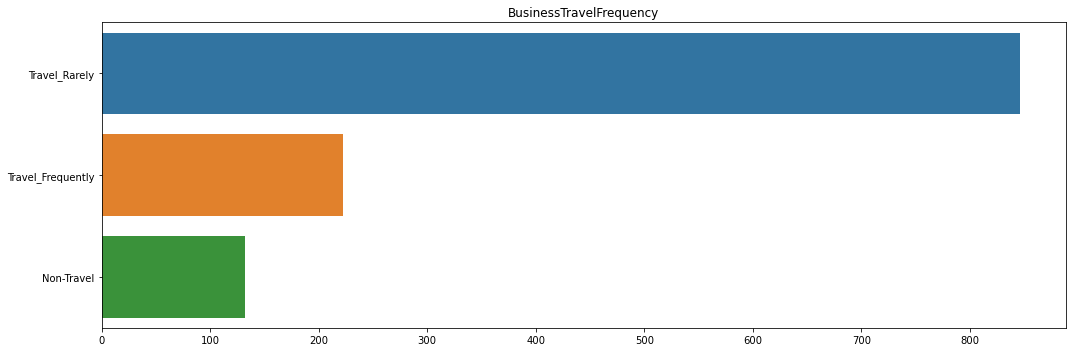

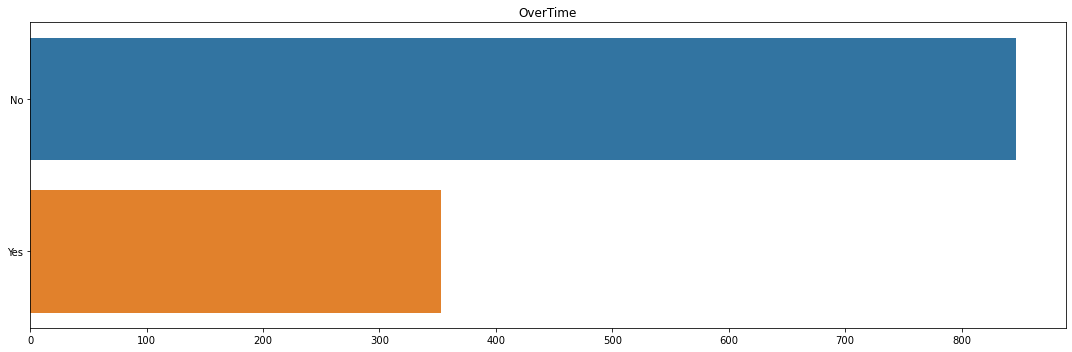

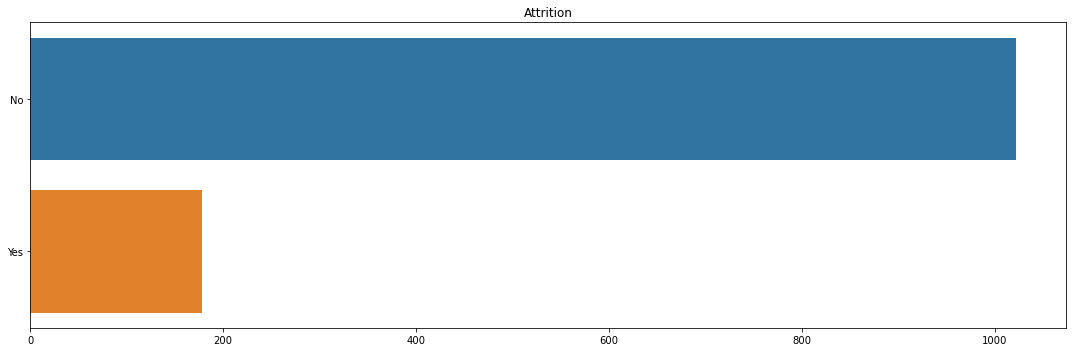

In [10]:
 for col in data.select_dtypes('object'):
    plt.figure(figsize=(15,5))
    sns.barplot(data[col].value_counts().values, data[col].value_counts().index, data=data)
    plt.title(col)    
    plt.tight_layout()

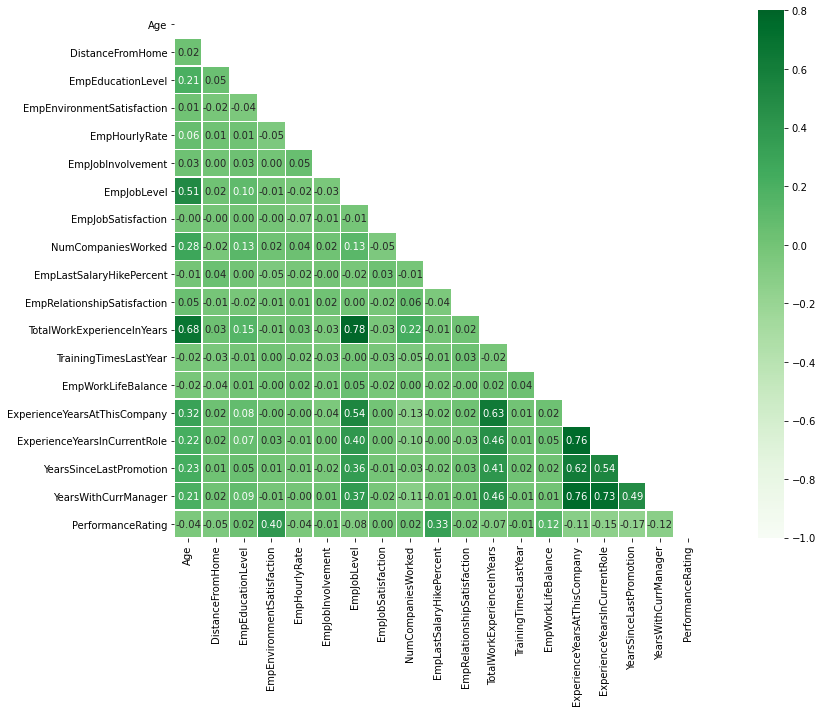

In [11]:
# Correlation Heat map of all numeric features
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True

fig = plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), annot=True, square=True,
            linewidths=0.2, fmt=".2f",center=0, vmin=-1, vmax=0.8, 
            mask=mask, cmap='Greens').figure.tight_layout()

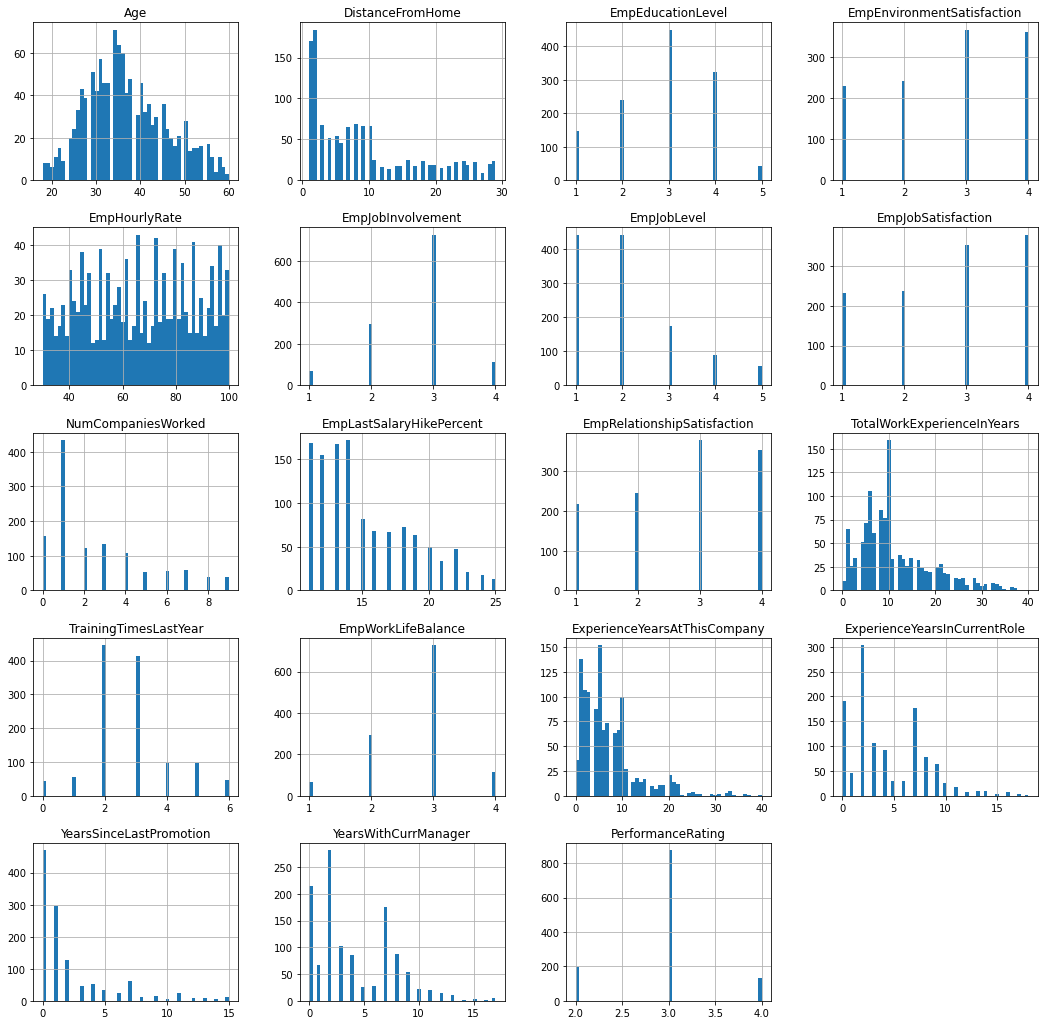

In [12]:
_= data.hist(bins=50, figsize=(18,18))

In [13]:
from collections import Counter

- <h><font size = "3"> Processing <b><font size = "4">Performance Rating</b>

In [14]:
data['PerformanceRating'].unique()

array([3, 4, 2], dtype=int64)

In [15]:
fig = px.bar(data['PerformanceRating'].value_counts(), color=data['PerformanceRating'].unique(),
             height=400, width=700, title="Performance Rating Of Employees <br> Normal, Good and Better")
fig.show()

In [16]:
colors= ['Red','maroon','orange']
fig= go.Figure(data=[go.Pie(labels=['Good Performer (3)','Normal Performer(2)','Best Performer (4)',
                                   ],
                            values=data['PerformanceRating'].value_counts(),)])

fig.update_traces(hoverinfo='label+percent', textfont_size=15,
                 textinfo='label+percent', 
                  pull=[0.1,0,0.2],
                 marker=dict(colors=colors, line=dict(color='#FFFFFF', 
                                                      width=2)))
fig.update_traces(title="<b> Percentage Of employees in Office based on Performance <br> Normal, Good and Best performer </b>",
                  titleposition="bottom center",titlefont_size=30)

fig

- <h><font size = "3"> Processing <b><font size = "4">Age Features</b>

In [17]:
Counter(data['Age'])

Counter({32: 46,
         47: 20,
         40: 46,
         41: 32,
         60: 3,
         27: 43,
         50: 28,
         28: 39,
         36: 60,
         38: 48,
         44: 30,
         30: 42,
         29: 51,
         42: 36,
         34: 71,
         39: 31,
         56: 11,
         53: 15,
         35: 64,
         52: 15,
         33: 46,
         25: 24,
         45: 36,
         23: 9,
         26: 33,
         54: 16,
         37: 41,
         24: 20,
         49: 21,
         55: 17,
         43: 26,
         51: 14,
         22: 15,
         31: 57,
         58: 11,
         20: 6,
         21: 11,
         48: 16,
         19: 8,
         18: 8,
         59: 6,
         46: 24,
         57: 4})

In [18]:
data['Age'].min(), data['Age'].max()

(18, 60)

In [19]:
age_dict = {"[18,19,20]": 1, "[21,22,23,24,25,26,27,28,29,30]": 2,
            "[31,32,33,34,35,36,37,38,39,40]": 3, "[41,42,43,44,45,46,47,48,49,50]": 4,
            "[51,52,53,54,55,56,57,58,59,60]": 5}

In [20]:
data['Age'].replace([18,19,20],1,inplace=True)
data['Age'].replace([21,22,23,24,25,26,27,28,29,30],2,inplace=True)
data['Age'].replace([31,32,33,34,35,36,37,38,39,40],3,inplace=True)
data['Age'].replace([41,42,43,44,45,46,47,48,49,50],4,inplace=True)
data['Age'].replace([51,52,53,54,55,56,57,58,59,60],5,inplace=True)

In [21]:
Counter(data['Age'])

Counter({3: 510, 4: 269, 5: 112, 2: 287, 1: 22})

In [22]:
fig= px.bar(data['Age'].value_counts(), color=data['Age'].unique(), 
       height=600, width=800, title="Age Group Present on office",
            text=data['Age'].value_counts())
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8)
fig.show()

In [23]:
data["Age"].value_counts()

3    510
2    287
4    269
5    112
1     22
Name: Age, dtype: int64

In [24]:
colors= ['lime',' maroon','navy', 'olive', 'purple']
fig= go.Figure(data=[go.Pie(labels=['Age(31 to 40)','Age(21 to 30)','Age( 41 to 50)',
                                    'Age(51 to 60)','Age(18 to 20)', 
                                   ],
                            values=data['Age'].value_counts())])

fig.update_traces(hoverinfo='label+percent', textfont_size=15,
                 textinfo='label+percent', 
                  pull=[0.1,0,0.2,0,0],
                 marker=dict(colors=colors, line=dict(color='#FFFFFF', 
                                                      width=2)))

fig

- <h><font size = "3"> Procssing <b><font size = "4">Gender Features</b>

In [25]:
data['Gender'].value_counts()

Male      725
Female    475
Name: Gender, dtype: int64

In [26]:
Counter(data['Gender'])

Counter({'Male': 725, 'Female': 475})

In [27]:
fig= px.bar(data['Gender'].value_counts(), color=data['Gender'].value_counts(),
      height=500, width=500, title="Count of Male and Female Employee in office",
      text=data['Gender'].value_counts())

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8)
fig.show()

- <h><font size = "3"> Processing <b><font size = "4">Educational BackGround </b> of Employees in office

In [28]:
data['EducationBackground'].value_counts()

Life Sciences       492
Medical             384
Marketing           137
Technical Degree    100
Other                66
Human Resources      21
Name: EducationBackground, dtype: int64

In [29]:
fig= px.bar(data['EducationBackground'].value_counts(), color=data['EducationBackground'].value_counts(),
      height=500, width=500, title="Count of Education Background of Employees in office",
      text=data['EducationBackground'].value_counts())

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8)
fig.show()

In [30]:
colors= ['Red','maroon','orange', 'gray','blue', 'pink']
fig= go.Figure(data=[go.Pie(labels=['Life Sciences','Medical','Marketing',
                                    'Technical Degree', 'Other', 'Human Resources'],
                            values=data['EducationBackground'].value_counts(),)])

fig.update_traces(hoverinfo='label+percent', textfont_size=15,
                 textinfo='label+percent', 
                  pull=[0.1,0,0.2,0,0,0],
                 marker=dict(colors=colors, line=dict(color='#FFFFFF', 
                                                      width=2)))
fig.update_traces(title="<b> Count Percentage of Education Background of Employees in office </b>",
                  titleposition="top center",titlefont_size=30)

fig

- <h><font size = "3">  <b><font size = "4">Marital Status</b> Of Employees

In [31]:
data['MaritalStatus'].value_counts()

Married     548
Single      384
Divorced    268
Name: MaritalStatus, dtype: int64

In [32]:
fig= px.bar(data['MaritalStatus'].value_counts(), color=data['MaritalStatus'].value_counts(),
      height=500, width=500, title="Count of Marital Status of Employees in office",
      text=data['MaritalStatus'].value_counts(), 
            labels={'value':'Count of Marital Status', 'index':'Marital Status'})

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8)
fig.show()

In [33]:
colors= ['Red','maroon','orange']
fig= go.Figure(data=[go.Pie(labels=['Married','Single','Divorced'],
                            values=data['EducationBackground'].value_counts(),)])

fig.update_traces(hoverinfo='label+percent', textfont_size=15,
                 textinfo='label+percent', 
                  pull=[0.1,0,0.2],
                 marker=dict(colors=colors, line=dict(color='#FFFFFF', 
                                                      width=2)))
fig.update_traces(title="<b> Count Percentage of Marital Status of Employees in office </b>",
                  titleposition="top center",titlefont_size=30)

fig

- <h><font size = "3">  Processing <b><font size = "4">Employees Departement </b>

In [34]:
fig= px.bar(data['EmpDepartment'].value_counts(), color=data['EmpDepartment'].value_counts(),
      height=600, width=700, title="Count of Marital Status of Employees in office",
      text=data['EmpDepartment'].value_counts(), 
            labels={'value':'No. of Employees', 'index':'Employees Department'})

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8)
fig.show()

In [35]:
data['EmpDepartment'].value_counts()

Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: EmpDepartment, dtype: int64

In [36]:
colors= ['Red','maroon','orange', 'gray','blue', 'pink']
fig= go.Figure(data=[go.Pie(labels=['Sales','Development','Research & Development',
                                    'Human Resources', 'Finance', 'Data Science'],
                            values=data['EducationBackground'].value_counts(),)])

fig.update_traces(hoverinfo='label+percent', textfont_size=15,
                 textinfo='label+percent', 
                  pull=[0.1,0,0.2,0,0,0],
                 marker=dict(colors=colors, line=dict(color='#FFFFFF', 
                                                      width=2)))
fig.update_traces(title="<b> Percentage of Employees with there Department in office </b>",
                  titleposition="top center",titlefont_size=30)

fig

- <h><font size = "3">  Processing <b><font size = "4">Over time </b>of Employeees

In [37]:
data['OverTime'].unique()

array(['No', 'Yes'], dtype=object)

In [38]:
fig= px.bar(data['OverTime'].value_counts(), color=data['OverTime'].value_counts(),
      height=500, width=500, title="Over Time of Employees (Yes or no)",
      text=data['OverTime'].value_counts(), 
            labels={'value':'Count of Over time', 'index':'Over time'})

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8)
fig.show()

- <h><font size = "3"> Processing <b><font size = "4">Experience Years</b> At This Company

In [39]:
data['ExperienceYearsAtThisCompany'].unique()

array([10,  7, 18, 21,  2,  9,  8,  1,  5, 22,  4,  0, 34,  6, 15,  3, 13,
       26, 20, 12, 31, 16, 11, 14, 17, 19, 32, 24, 33, 29, 25, 36, 30, 23,
       27, 37, 40], dtype=int64)

In [40]:
fig = px.histogram(data['ExperienceYearsAtThisCompany'], 
                   labels={'count':'Count Of Exprience', 'value':'Year Of Exprience'},
                   title= 'Experience Years At This Company',
                   marginal='violin',
                   color_discrete_sequence=['green'], height=600, width=1000)

fig

In [41]:
fig= px.bar(data['EmpEnvironmentSatisfaction'].value_counts(), color=data['EmpEnvironmentSatisfaction'].value_counts(),
      height=500, width=500, title="Employees Environment Satisfaction in Office",
      text=data['EmpEnvironmentSatisfaction'].value_counts(), 
            labels={'value':'Count of Environment Satisfaction Rating', 'index':'Employees Environment Satisfaction Level'})

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8)
fig.show()

- <h><font size = "3"> Processing <b><font size = "4">EmpEnvironmentSatisfaction</b> features

In [42]:
data['EmpEnvironmentSatisfaction'].value_counts()

3    367
4    361
2    242
1    230
Name: EmpEnvironmentSatisfaction, dtype: int64

In [43]:
colors= ['Red','maroon','orange', 'gray']
fig= go.Figure(data=[go.Pie(labels=['Good(3)','Very Good(4)','Normal(2)','Low(1)'],
                            values=data['EmpEnvironmentSatisfaction'].value_counts(),)])

fig.update_traces(hoverinfo='label+percent', textfont_size=15,
                 textinfo='label+percent', 
                  pull=[0.1,0,0.2,0,0,0],
                 marker=dict(colors=colors, line=dict(color='#FFFFFF', 
                                                      width=2)))
fig.update_traces(title="<b> Percentage of Employees Environment Satisfaction Rating in Office </b>",
                  titleposition="top center",titlefont_size=30)

fig

- <h><font size = "3"> Processing EmpLastSalaryHikePercent features

In [44]:
data['EmpLastSalaryHikePercent'].unique()

array([12, 21, 15, 14, 13, 23, 11, 20, 19, 17, 18, 22, 16, 24, 25],
      dtype=int64)

In [45]:
fig = px.histogram(data['EmpLastSalaryHikePercent'], 
                   labels={'count':'Count Of Salary Hike Percent', 'value':'Last Salary Hike Percent'},
                   title= 'Last Salary Hike Percent At This Company',
                   marginal='violin',
                   color_discrete_sequence=['green'], height=600, width=900, )

fig

- <h><font size = "3"> Processing <b><font size = "4"> EmpWorkLifeBalance </b>features

In [46]:
fig = px.histogram(data['EmpWorkLifeBalance'], 
                   labels={'count':'Count Of No of Employees', 'value':'Employees Work Life Balance'},
                   title= 'Employees Work Life in office',
                   marginal='violin',
                   color_discrete_sequence=['green'], height=600, width=900, )

fig

In [47]:
data['EmpWorkLifeBalance'].value_counts()

3    727
2    294
4    115
1     64
Name: EmpWorkLifeBalance, dtype: int64

In [48]:
colors= ['Red','maroon','orange', 'gray']
fig= go.Figure(data=[go.Pie(labels=['Work Life well balanced(3)','Work Life best balanced(4)',
                                    'Work Life balanced(2)','Work Life not balanced(1)'],
                            values=data['EmpWorkLifeBalance'].value_counts(),)])

fig.update_traces(hoverinfo='label+percent', textfont_size=15,
                 textinfo='label+percent', 
                  pull=[0.1,0,0.2,0,0,0],
                 marker=dict(colors=colors, line=dict(color='#FFFFFF', 
                                                      width=2)))
fig.update_traces(title="<b> Percentage of Employees Work Life in Office </b>",
                  titleposition="top center",titlefont_size=30)

fig

# Department wise performances

In [49]:
data.head(3)

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,3,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,4,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,3,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Age                           1200 non-null   int64 
 1   Gender                        1200 non-null   object
 2   EducationBackground           1200 non-null   object
 3   MaritalStatus                 1200 non-null   object
 4   EmpDepartment                 1200 non-null   object
 5   EmpJobRole                    1200 non-null   object
 6   BusinessTravelFrequency       1200 non-null   object
 7   DistanceFromHome              1200 non-null   int64 
 8   EmpEducationLevel             1200 non-null   int64 
 9   EmpEnvironmentSatisfaction    1200 non-null   int64 
 10  EmpHourlyRate                 1200 non-null   int64 
 11  EmpJobInvolvement             1200 non-null   int64 
 12  EmpJobLevel                   1200 non-null   int64 
 13  EmpJobSatisfaction

In [51]:
dept = data.iloc[:,[4,26]].copy()
dept_per = dept.copy()

In [52]:
dept_per.head()

,EmpDepartment,PerformanceRating
0,Sales,3
1,Sales,3
2,Sales,4
3,Human Resources,3
4,Sales,3


In [53]:
# Finding out the mean performance of all the departments and plotting its bar graph using seaborn.
dept_per.groupby(by='EmpDepartment')['PerformanceRating'].mean()

EmpDepartment
Data Science              3.050000
Development               3.085873
Finance                   2.775510
Human Resources           2.925926
Research & Development    2.921283
Sales                     2.860590
Name: PerformanceRating, dtype: float64

<AxesSubplot:xlabel='EmpDepartment', ylabel='PerformanceRating'>

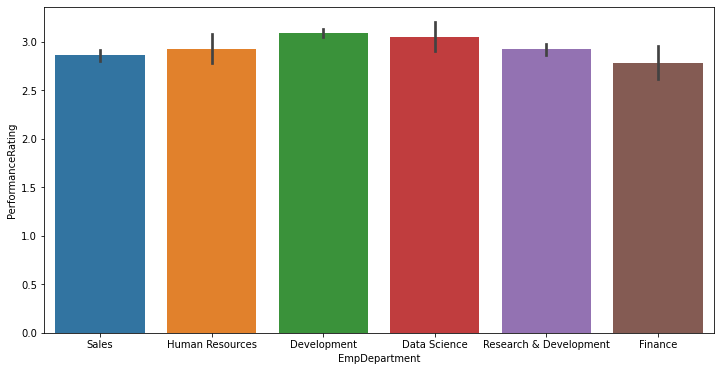

In [54]:
fig=plt.figure(figsize=(12,6))
sns.barplot(dept_per['EmpDepartment'], dept_per['PerformanceRating'])

In [55]:
# Grouping with Each Department
dept_per.groupby(by='EmpDepartment')['PerformanceRating'].value_counts()

EmpDepartment           PerformanceRating
Data Science            3                     17
                        4                      2
                        2                      1
Development             3                    304
                        4                     44
                        2                     13
Finance                 3                     30
                        2                     15
                        4                      4
Human Resources         3                     38
                        2                     10
                        4                      6
Research & Development  3                    234
                        2                     68
                        4                     41
Sales                   3                    251
                        2                     87
                        4                     35
Name: PerformanceRating, dtype: int64

In [56]:
# Creating a new dataframe to analyze each department separately
department = pd.get_dummies(dept_per['EmpDepartment'])
performance = pd.DataFrame(dept_per['PerformanceRating'])
dept_rating = pd.concat([department,performance],axis=1)

In [57]:
dept_rating.head()

,Data Science,Development,Finance,Human Resources,Research & Development,Sales,PerformanceRating
0,0,0,0,0,0,1,3
1,0,0,0,0,0,1,3
2,0,0,0,0,0,1,4
3,0,0,0,1,0,0,3
4,0,0,0,0,0,1,3


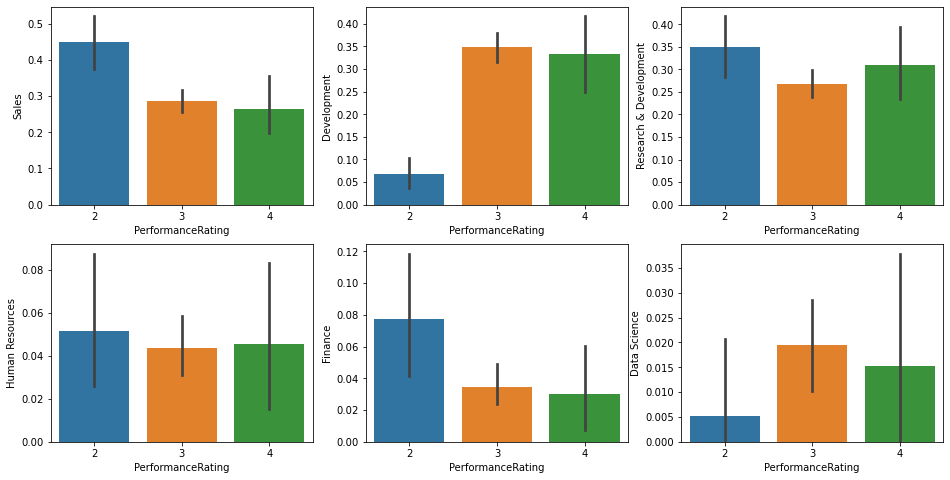

In [58]:
# Performance rating with Each Department
fig=plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
sns.barplot(dept_rating['PerformanceRating'],dept_rating['Sales'])
plt.subplot(2,3,2)
sns.barplot(dept_rating['PerformanceRating'],dept_rating['Development'])
plt.subplot(2,3,3)
sns.barplot(dept_rating['PerformanceRating'],dept_rating['Research & Development'])
plt.subplot(2,3,4)
sns.barplot(dept_rating['PerformanceRating'],dept_rating['Human Resources'])
plt.subplot(2,3,5)
sns.barplot(dept_rating['PerformanceRating'],dept_rating['Finance'])
plt.subplot(2,3,6)
sns.barplot(dept_rating['PerformanceRating'],dept_rating['Data Science'])
plt.show()

In [59]:
data1=data.copy()

In [60]:
#  Encoding all the ordinal columns and creating a dummy variable for them to see if there are any effects on Performance Rating
enc = LabelEncoder()
for i in (1,2,3,4,5,6,15,25):
    data1.iloc[:,i] = enc.fit_transform(data1.iloc[:,i])
data1.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,3,1,2,2,5,13,2,10,3,4,55,3,2,4,1,0,12,4,10,2,2,10,7,0,8,0,3
1,4,1,2,2,5,13,2,14,4,4,42,3,2,1,2,0,12,4,20,2,3,7,7,1,7,0,3
2,3,1,1,1,5,13,1,5,4,4,48,2,3,1,5,1,21,3,20,2,3,18,13,1,12,0,4
3,4,1,0,0,3,8,2,10,4,2,73,2,5,4,3,0,15,2,23,2,2,21,6,12,6,0,3
4,5,1,2,2,5,13,2,16,4,1,84,3,2,1,8,0,14,4,10,1,3,2,2,2,2,0,3


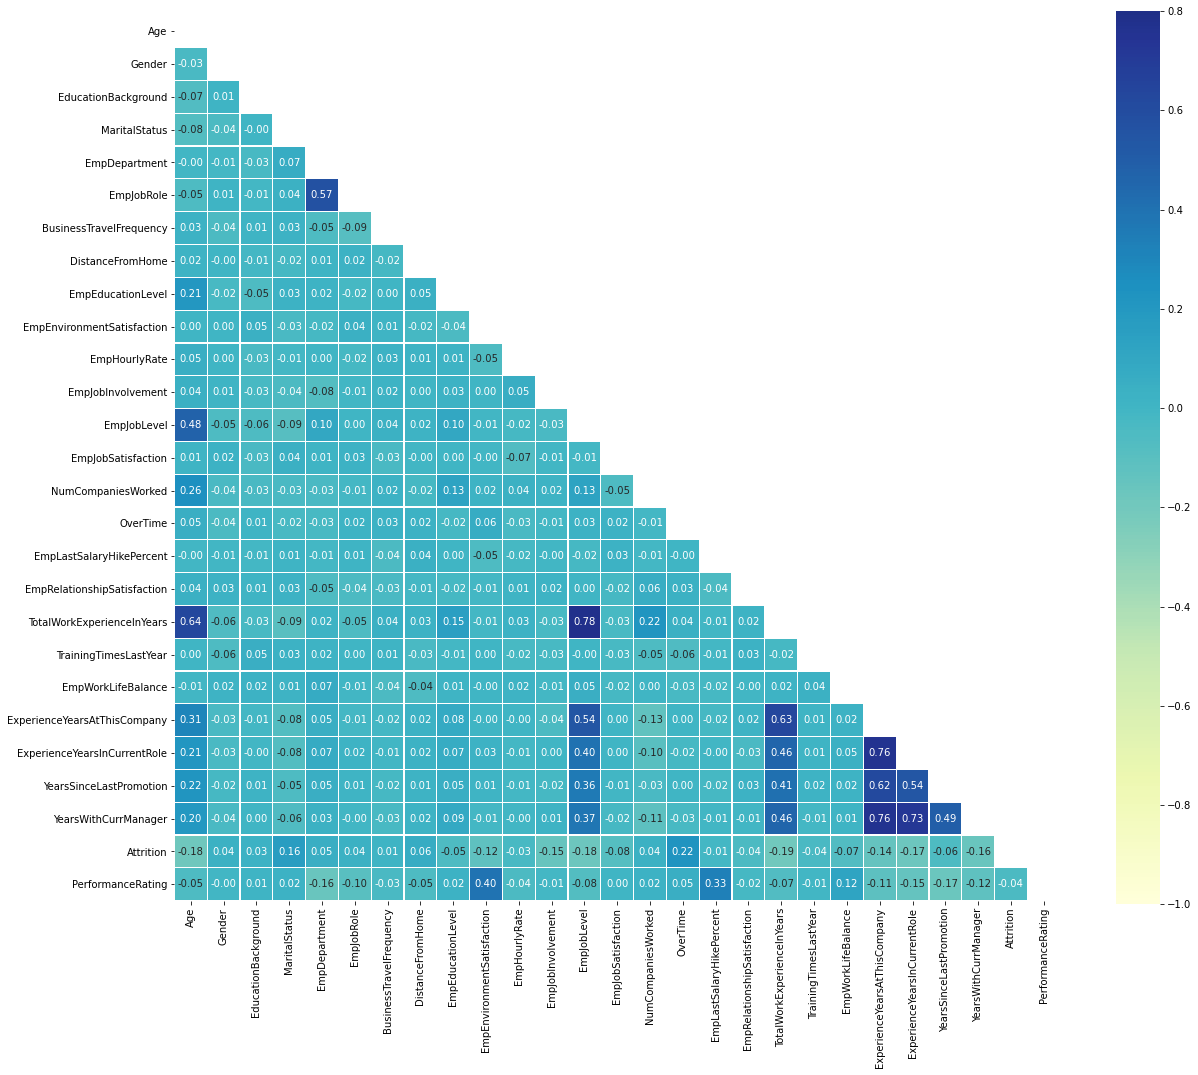

In [61]:
corr = data1.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True

fig = plt.figure(figsize=(18,15))
sns.heatmap(data1.corr(), annot=True, square=True,
            linewidths=0.2, fmt=".2f",center=0, vmin=-1, vmax=0.8, 
            mask=mask, cmap='YlGnBu').figure.tight_layout()

<h><font size= "3"> <b><font size= "4">EmpEnvironmentSatisfaction, EmpLastSalaryHikePercent, EmpWorkLifeBalance</b> These are Top 3 Important Factors effecting employee performance

# 1. Firstly I train my model without feature selection

In [62]:
target=data1['PerformanceRating']
data1.drop(['PerformanceRating'], axis=1, inplace=True)

In [63]:
target.head()

0    3
1    3
2    4
3    3
4    3
Name: PerformanceRating, dtype: int64

Age
0.26286774324184886


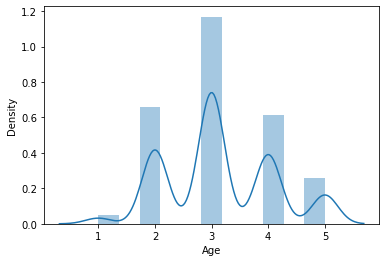

Gender
-0.42601432284230467


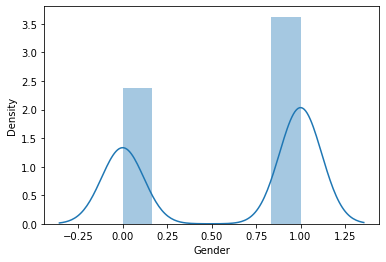

EducationBackground
0.5513749427617737


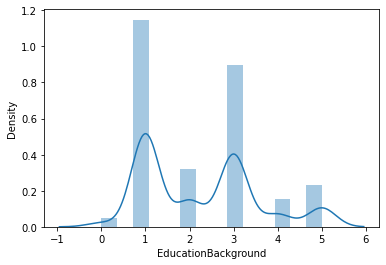

MaritalStatus
-0.15144003526169916


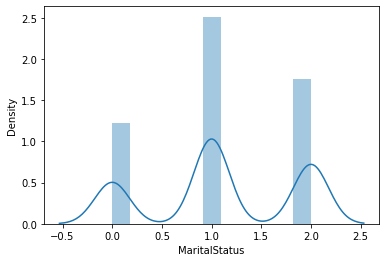

EmpDepartment
-0.40791122659206125


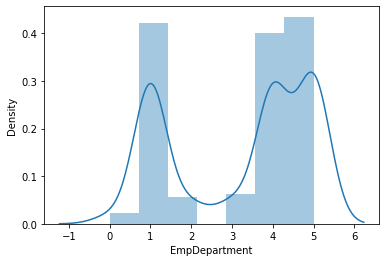

EmpJobRole
-0.11151335264121637


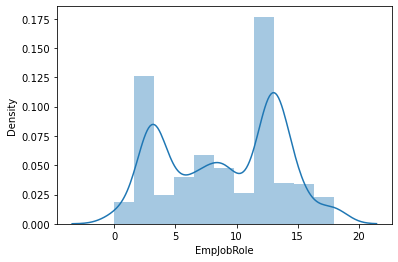

BusinessTravelFrequency
-1.4010025618647997


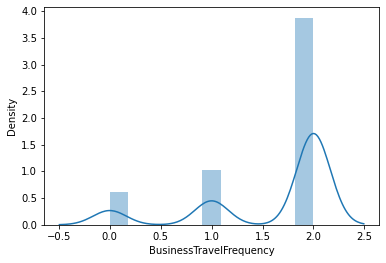

DistanceFromHome
0.9617520027440261


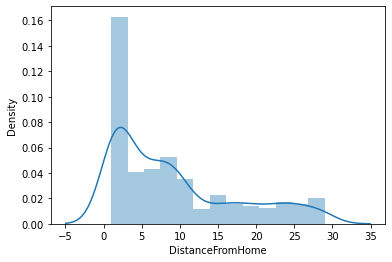

EmpEducationLevel
-0.2506601284752214


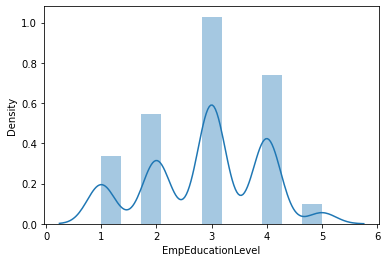

EmpEnvironmentSatisfaction
-0.30728009854747024


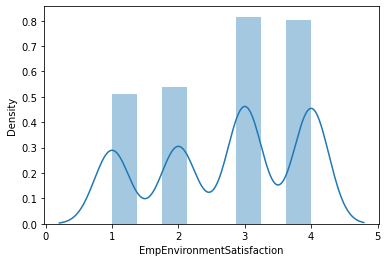

EmpHourlyRate
-0.03512091677629664


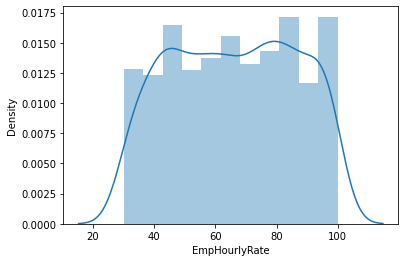

EmpJobInvolvement
-0.557148517102972


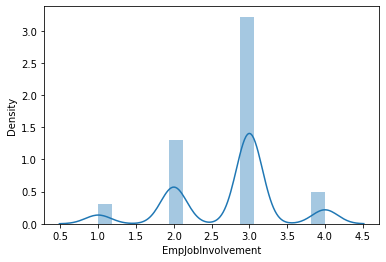

EmpJobLevel
1.0227726333242322


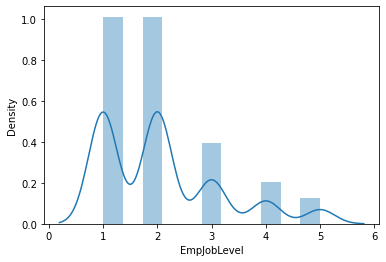

EmpJobSatisfaction
-0.3238707122459925


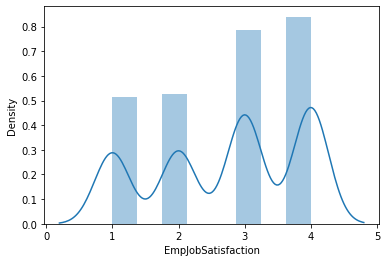

NumCompaniesWorked
1.0473235057412895


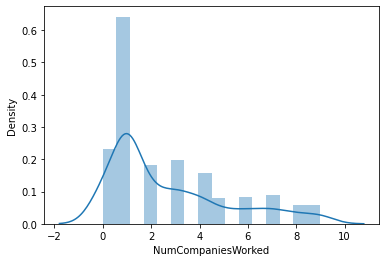

OverTime
0.9034370375907383


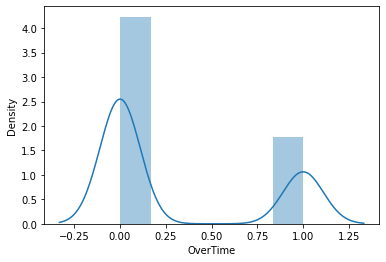

EmpLastSalaryHikePercent
0.8076424650015763


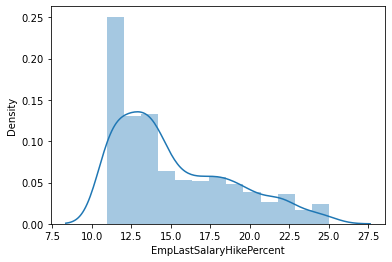

EmpRelationshipSatisfaction
-0.3181646608029888


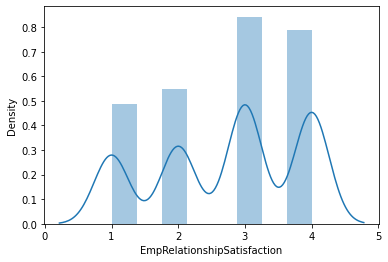

TotalWorkExperienceInYears
1.085502810408189


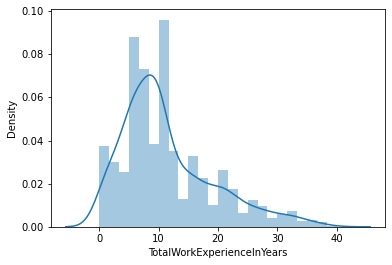

TrainingTimesLastYear
0.5314078759928476


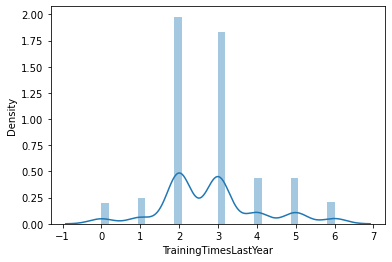

EmpWorkLifeBalance
-0.5385567854332284


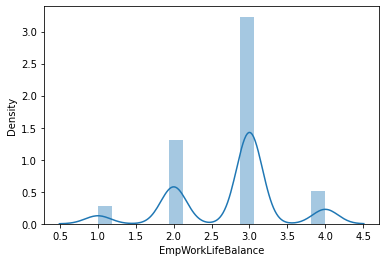

ExperienceYearsAtThisCompany
1.7868178842417548


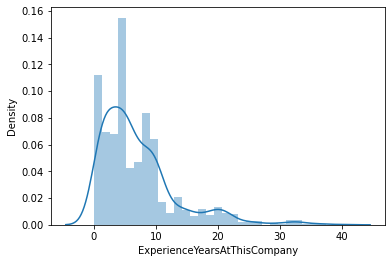

ExperienceYearsInCurrentRole
0.8870480862786159


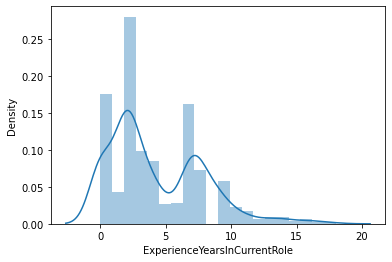

YearsSinceLastPromotion
1.9724620367914252


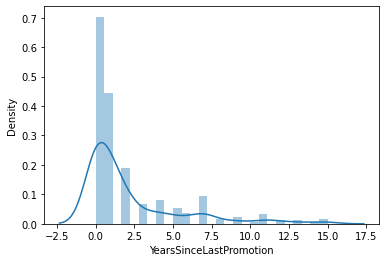

YearsWithCurrManager
0.81214149476762


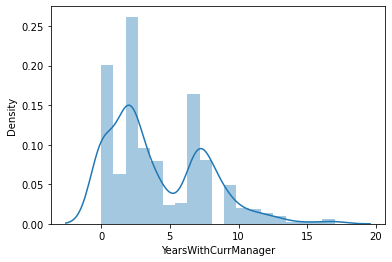

Attrition
1.9788232187751977


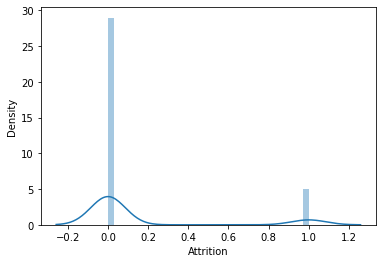

In [64]:
for col in data1:
    print(col)
    print(skew(data1[col]))
    
    plt.figure()
    sns.distplot(data1[col])
    plt.show()

In [65]:
data2=data1.copy()

In [66]:
scalar=StandardScaler()
scalar.fit(data2)

StandardScaler()

In [67]:
# Create Data frame of scaled data
data2 = pd.DataFrame(scalar.transform(data2), index=data2.index, columns=data2.columns)

In [68]:
data2.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,-0.142957,0.809427,-0.179459,1.236181,1.052350,0.833426,0.596508,0.102061,0.103000,1.177978,-0.543569,0.379608,-0.060955,1.151824,-0.674538,-0.645573,-0.889111,1.185833,-0.170645,-0.622235,-1.064491,0.468778,0.749766,-0.681372,1.100251,-0.417335
1,0.915985,0.809427,-0.179459,1.236181,1.052350,0.833426,0.596508,0.591464,1.061145,1.177978,-1.187042,0.379608,-0.060955,-1.574386,-0.269410,-0.645573,-0.889111,1.185833,1.112397,-0.622235,0.365956,-0.012431,0.749766,-0.370834,0.817773,-0.417335
2,-0.142957,0.809427,-0.943112,-0.132285,1.052350,0.833426,-0.876351,-0.509693,1.061145,1.177978,-0.890055,-1.035081,0.842082,-1.574386,0.945974,1.549010,1.594054,0.255768,1.112397,-0.622235,0.365956,1.752001,2.410786,-0.370834,2.230163,-0.417335
3,0.915985,0.809427,-1.706766,-1.500751,-0.126754,-0.218658,0.596508,0.102061,1.061145,-0.656641,0.347393,-1.035081,2.648157,1.151824,0.135718,-0.645573,-0.061389,-0.674297,1.497310,-0.622235,-1.064491,2.233210,0.472929,3.045084,0.535296,-0.417335
4,1.974928,0.809427,-0.179459,1.236181,1.052350,0.833426,0.596508,0.836165,1.061145,-1.573950,0.891870,0.379608,-0.060955,-1.574386,2.161359,-0.645573,-0.337297,1.185833,-0.170645,-1.414051,0.365956,-0.814446,-0.634417,-0.060296,-0.594616,-0.417335


In [69]:
x=data2
y=target

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [71]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((840, 26), (360, 26), (840,), (360,))

# Auto Ml

In [72]:
x_train_AML = pd.DataFrame(x_train)
y_train_AML = pd.DataFrame(y_train)

In [73]:
setup(pd.concat([x_train_AML, y_train_AML], axis=1), target='PerformanceRating')

,Description,Value
0,session_id,3683
1,Target,PerformanceRating
2,Target Type,Multiclass
3,Label Encoded,"2: 0, 3: 1, 4: 2"
4,Original Data,"(840, 27)"
5,Missing Values,False
6,Numeric Features,23
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


({'USI',
  'X',
  'X_test',
  'X_train',
  '_all_metrics',
  '_all_models',
  '_all_models_internal',
  '_available_plots',
  '_gpu_n_jobs_param',
  '_internal_pipeline',
  '_ml_usecase',
  'create_model_container',
  'data_before_preprocess',
  'display_container',
  'exp_name_log',
  'experiment__',
  'fix_imbalance_method_param',
  'fix_imbalance_param',
  'fold_generator',
  'fold_groups_param',
  'fold_groups_param_full',
  'fold_param',
  'fold_shuffle_param',
  'gpu_param',
  'html_param',
  'imputation_classifier',
  'imputation_regressor',
  'iterative_imputation_iters_param',
  'log_plots_param',
  'logging_param',
  'master_model_container',
  'n_jobs_param',
  'prep_pipe',
  'pycaret_globals',
  'seed',
  'stratify_param',
  'target_param',
  'transform_target_method_param',
  'transform_target_param',
  'y',
  'y_test',
  'y_train'},
 True,
 '838d',
 {'lr': <pycaret.containers.models.classification.LogisticRegressionClassifierContainer at 0x206a9353f40>,
  'knn': <pycaret.

In [74]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9233,0.9513,0.8816,0.9268,0.9225,0.8279,0.8298,0.3830
xgboost,Extreme Gradient Boosting,0.9216,0.9463,0.8764,0.9246,0.9204,0.8222,0.8240,0.5650
lightgbm,Light Gradient Boosting Machine,0.9182,0.9534,0.8770,0.9234,0.9177,0.8171,0.8197,0.4740
catboost,CatBoost Classifier,0.9182,0.9565,0.8792,0.9236,0.9178,0.8180,0.8204,3.4670
rf,Random Forest Classifier,0.9148,0.9461,0.8315,0.9188,0.9116,0.8013,0.8058,0.2410
dt,Decision Tree Classifier,0.8739,0.8553,0.8199,0.8809,0.8735,0.7159,0.7212,0.0200
et,Extra Trees Classifier,0.8229,0.9185,0.5941,0.8103,0.7924,0.5254,0.5631,0.2170
lr,Logistic Regression,0.7991,0.8687,0.6591,0.7919,0.7880,0.5183,0.5254,1.0120
lda,Linear Discriminant Analysis,0.7922,0.8768,0.6858,0.7915,0.7846,0.5163,0.5218,0.0960
nb,Naive Bayes,0.7819,0.8623,0.6293,0.7748,0.7699,0.4699,0.4781,0.0200


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=3683, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

# Algorithms

In [75]:
# Evaluate These Algorithm for training
models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression" : LogisticRegression(),
    "Decision Tree" : DecisionTreeClassifier(),
    "xgboost": XGBClassifier(eval_metric='mlogloss'),
    "Extra Trees": ExtraTreesClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Lightgbm" : LGBMClassifier()
}

 <h><font size = "3"> Training the Model

In [76]:
AccuracyScore = {'Accuracy':{},'Mean':{},'std':{}}
mse_results = {'MSE':{},'Mean':{},'std':{}}
n_folds = 5
kfold = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(x_train)

for name in models:
    model = models[name]
    Accuracy = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=kfold)   #Accuracy
    mse = np.sqrt(-cross_val_score(model,x_train , y_train, cv=kfold,        #MSE
                                   scoring='neg_mean_squared_error'))
    
    #save the Accuracy Score reults
    AccuracyScore['Accuracy'][name] = Accuracy
    AccuracyScore['Mean'][name] = Accuracy.mean()
    AccuracyScore['std'][name] = Accuracy.std()
    
    #save the MSE reults
    mse_results['MSE'][name] = mse
    mse_results['Mean'][name] = mse.mean()
    mse_results['std'][name] = mse.std()

In [77]:
AccuracyScoreCV = pd.DataFrame(index=AccuracyScore['Accuracy'].keys())

AccuracyScoreCV['Max'] = [AccuracyScore['Accuracy'][m].max() for m in AccuracyScore['Accuracy'].keys()]
    #append the max Accuracy Score for each model to the dataframe
AccuracyScoreCV['Mean'] = [AccuracyScore['Mean'][m] for m in AccuracyScore['Mean'].keys()]
    #append the mean of all Accuracy Score for each model to the dataframe

AccuracyScoreCV['Min'] = [AccuracyScore['Accuracy'][m].min() for m in AccuracyScore['Accuracy'].keys()]
    #append the min Accuracy Score for each model to the dataframe
    
AccuracyScoreCV['std'] = [AccuracyScore['std'][m] for m in AccuracyScore['std'].keys()]
    #append the std of all Accuracy Score for each model to the dataframe

AccuracyScoreCV = AccuracyScoreCV.sort_values(by='Mean',ascending=False)

AccuracyScoreCV

,Max,Mean,Min,std
Gradient Boosting,0.952381,0.940476,0.934524,0.006521
xgboost,0.946429,0.932143,0.910714,0.012257
Lightgbm,0.952381,0.932143,0.910714,0.014385
Random Forest,0.940476,0.928571,0.910714,0.010648
Decision Tree,0.928571,0.892857,0.869048,0.020273
Extra Trees,0.869048,0.826190,0.797619,0.028522
Logistic Regression,0.827381,0.803571,0.761905,0.024105


In [78]:
AccuracyScoreCV.iplot(kind='bar',
                 title='Max, Min, Mean, and standard deviation <br>For Accuracy Score for each model',
                     text='Mean')

In [79]:
mse_cv_results = pd.DataFrame(index=mse_results['MSE'].keys())


mse_cv_results['Max'] = [mse_results['MSE'][m].max() for m in mse_results['MSE'].keys()]
    #append the max MSE for each model to the dataframe

mse_cv_results['Mean'] = [mse_results['Mean'][m] for m in mse_results['Mean'].keys()]
    #append the mean of all MSE for each model to the dataframe

mse_cv_results['Min'] = [mse_results['MSE'][m].min() for m in mse_results['MSE'].keys()]
    #append the min MSE for each model to the dataframe
    
mse_cv_results['std'] = [mse_results['std'][m] for m in mse_results['std'].keys()]
    #append the std of all MSE for each model to the dataframe


mse_cv_results = mse_cv_results.sort_values(by='Mean',ascending=False)
mse_cv_results

,Max,Mean,Min,std
Logistic Regression,0.523268,0.476679,0.429562,0.036725
Extra Trees,0.429562,0.395603,0.353553,0.025323
Decision Tree,0.400892,0.348793,0.308607,0.031025
xgboost,0.327327,0.271489,0.231455,0.035965
Lightgbm,0.318105,0.271456,0.218218,0.036218
Random Forest,0.345033,0.263836,0.231455,0.042652
Gradient Boosting,0.298807,0.252172,0.218218,0.026366


In [80]:
mse_cv_results.iplot(kind='bar',
                 title='Max, Min, Mean, and standard deviation <br>For Mean squared Error values for each model',
                     text='Mean')

 <h><font size = "3"> Testing the Model

In [81]:
# Preprocessing, fitting, making predictions and scoring for every model:
models_data = {'Accuracy':{},
               'Recall':{},
               'Precision':{},
               'F1 Score':{},
              'MSE':{}}

for name in models:
    #fitting the model
    model = models[name].fit(x_train, y_train)    
    y_pred = model.predict(x_test)
    
    #calculate the Accuracy of model with all algorithm
    AccuracyScore = accuracy_score(y_test,y_pred,)
    models_data['Accuracy'][name]= AccuracyScore
    
    #calculate the RecallScore of model with all algorithm
    RecallScore = recall_score(y_test, y_pred,average='weighted')         
    models_data['Recall'][name] = RecallScore
               
    #calculate Precision Score of model with all algorithm
    PrecisionScore= precision_score(y_test, y_pred,average='weighted')
    models_data['Precision'][name]= PrecisionScore

    #calculate F1 Score of model with all algorithm    
    F1_Score = f1_score(y_test, y_pred,average='weighted')
    models_data['F1 Score'][name]= F1_Score
    
    #calculate Mean Squared Error of model with all algorithm    
    MSE_value = mean_squared_error(y_test, y_pred)
    models_data['MSE'][name]= MSE_value
        
    print('\n========================={}========================='.format(name))
    print('******************************************************')
    print('Accuracy    : ',AccuracyScore)
    print('Recall: ',RecallScore) 
    print('Precision    : ',PrecisionScore) 
    print('F1 Score    : ',F1_Score) 
    print('MSE   : ',MSE_value)  


=========================Random Forest=========================
******************************************************
Accuracy    :  0.9166666666666666
Recall:  0.9166666666666666
Precision    :  0.915954861111111
F1 Score    :  0.9139299727148323
MSE   :  0.08333333333333333

=========================Logistic Regression=========================
******************************************************
Accuracy    :  0.8194444444444444
Recall:  0.8194444444444444
Precision    :  0.818359735122119
F1 Score    :  0.818542212245916
MSE   :  0.20555555555555555

=========================Decision Tree=========================
******************************************************
Accuracy    :  0.8638888888888889
Recall:  0.8638888888888889
Precision    :  0.8704064085079911
F1 Score    :  0.8664024739867333
MSE   :  0.16111111111111112

=========================xgboost=========================
******************************************************
Accuracy    :  0.9111111111111111
Recall:  

In [82]:
Score_value = pd.DataFrame(models_data)
Score_value   # Test Value

,Accuracy,Recall,Precision,F1 Score,MSE
Random Forest,0.916667,0.916667,0.915955,0.913930,0.083333
Logistic Regression,0.819444,0.819444,0.818360,0.818542,0.205556
Decision Tree,0.863889,0.863889,0.870406,0.866402,0.161111
xgboost,0.911111,0.911111,0.911664,0.909869,0.088889
Extra Trees,0.847222,0.847222,0.852338,0.829619,0.152778
Gradient Boosting,0.911111,0.911111,0.911236,0.910692,0.088889
Lightgbm,0.908333,0.908333,0.909086,0.907898,0.091667


 <h><font size = "3"> Performance Matrix of Model

In [83]:
# Preprocessing, fitting, making predictions and scoring for every model:
models_Evaluation_matrix = {'confusion_matrix':{},
                          'classification_report':{}} 

for name in models:
    #fitting the model
    model = models[name].fit(x_train, y_train)    
    y_pred = model.predict(x_test)
    
    #calculate the Confusion matrix of model with all algorithm
    ConfusionMatrix = confusion_matrix(y_test,y_pred)
    models_Evaluation_matrix['confusion_matrix'][name]= ConfusionMatrix
    
    #calculate the Confusion matrix of model with all algorithm
    ClassificationReport = classification_report(y_test,y_pred)
    models_Evaluation_matrix['classification_report'][name]= ClassificationReport
        
    print('\n========================={}========================='.format(name))
    print('******************************************************')
    print('confusion_matrix    : \n',ConfusionMatrix)
    print("")
    print('classification_report    : \n',ClassificationReport)


=========================Random Forest=========================
******************************************************
confusion_matrix    : 
 [[ 42   7   0]
 [  7 259   2]
 [  0  13  30]]

classification_report    : 
               precision    recall  f1-score   support

           2       0.86      0.86      0.86        49
           3       0.93      0.97      0.95       268
           4       0.94      0.70      0.80        43

    accuracy                           0.92       360
   macro avg       0.91      0.84      0.87       360
weighted avg       0.92      0.92      0.92       360


=========================Logistic Regression=========================
******************************************************
confusion_matrix    : 
 [[ 28  20   1]
 [ 20 239   9]
 [  2  13  28]]

classification_report    : 
               precision    recall  f1-score   support

           2       0.56      0.57      0.57        49
           3       0.88      0.89      0.89       268
          

 <h><font size = "6"> 2. Now Train the model with features selection

In [84]:
x=data1
y=target

In [85]:
#apply selectkbest class to select top ten k best feature
bestfeature= SelectKBest(score_func=chi2,k=10)
fit=(bestfeature.fit(x,y))

In [86]:
DataScores=pd.DataFrame(fit.scores_)
DataColumns=pd.DataFrame(x.columns)

In [87]:
featureScores=pd.concat([DataColumns,DataScores],axis=1)
featureScores.columns=['Features Name','Score']

 <h><font size = "4"> Check the features whcih has highly affecting the prediction by Score

In [88]:
featureScores= featureScores.sort_values(by='Score', ascending=False)
featureScores

,Features Name,Score
16,EmpLastSalaryHikePercent,297.136917
23,YearsSinceLastPromotion,238.004284
21,ExperienceYearsAtThisCompany,133.602068
22,ExperienceYearsInCurrentRole,120.860036
9,EmpEnvironmentSatisfaction,110.691319
24,YearsWithCurrManager,87.483471
4,EmpDepartment,46.787010
18,TotalWorkExperienceInYears,41.593037
5,EmpJobRole,35.896167
7,DistanceFromHome,18.650010


In [89]:
#On basis of feature importancee
model=ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [90]:
model.feature_importances_

array([0.02556719, 0.0186832 , 0.02404112, 0.02357687, 0.04660604,
       0.03219285, 0.02080434, 0.02852472, 0.02726481, 0.15547807,
       0.03083855, 0.0234228 , 0.02364671, 0.02590966, 0.02618572,
       0.01549435, 0.15922507, 0.02442879, 0.02673246, 0.02508373,
       0.03263298, 0.03123   , 0.03973744, 0.0674105 , 0.03218289,
       0.01309914])

In [91]:
# using ExtraTreesClassifier for feature importance
feat_importances=pd.Series(model.feature_importances_,index=x.columns)

In [92]:
feat_importances.nlargest(20).iplot(kind='scatter',
                 title='On basis of ExtraTreesClassifier Visualize feature importance')

In [93]:
X_features=data2[['EmpLastSalaryHikePercent','YearsSinceLastPromotion','ExperienceYearsAtThisCompany',
                 'ExperienceYearsInCurrentRole','EmpEnvironmentSatisfaction','YearsWithCurrManager','EmpDepartment',
                 'TotalWorkExperienceInYears','EmpJobRole','DistanceFromHome','EmpHourlyRate']]

In [94]:
X_features.head()

,EmpLastSalaryHikePercent,YearsSinceLastPromotion,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,EmpEnvironmentSatisfaction,YearsWithCurrManager,EmpDepartment,TotalWorkExperienceInYears,EmpJobRole,DistanceFromHome,EmpHourlyRate
0,-0.889111,-0.681372,0.468778,0.749766,1.177978,1.100251,1.052350,-0.170645,0.833426,0.102061,-0.543569
1,-0.889111,-0.370834,-0.012431,0.749766,1.177978,0.817773,1.052350,1.112397,0.833426,0.591464,-1.187042
2,1.594054,-0.370834,1.752001,2.410786,1.177978,2.230163,1.052350,1.112397,0.833426,-0.509693,-0.890055
3,-0.061389,3.045084,2.233210,0.472929,-0.656641,0.535296,-0.126754,1.497310,-0.218658,0.102061,0.347393
4,-0.337297,-0.060296,-0.814446,-0.634417,-1.573950,-0.594616,1.052350,-0.170645,0.833426,0.836165,0.891870


In [95]:
X_train, X_test, y_train, y_test = train_test_split(X_features,y, test_size=0.2, random_state=42)

In [96]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((960, 11), (240, 11), (960,), (240,))

# Auto Ml

In [97]:
x_train_AML_F = pd.DataFrame(X_train)
y_train_AML_F = pd.DataFrame(y_train)

In [98]:
setup(pd.concat([x_train_AML_F, y_train_AML_F], axis=1), target='PerformanceRating')

,Description,Value
0,session_id,6136
1,Target,PerformanceRating
2,Target Type,Multiclass
3,Label Encoded,"2: 0, 3: 1, 4: 2"
4,Original Data,"(960, 12)"
5,Missing Values,False
6,Numeric Features,11
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


({'USI',
  'X',
  'X_test',
  'X_train',
  '_all_metrics',
  '_all_models',
  '_all_models_internal',
  '_available_plots',
  '_gpu_n_jobs_param',
  '_internal_pipeline',
  '_ml_usecase',
  'create_model_container',
  'data_before_preprocess',
  'display_container',
  'exp_name_log',
  'experiment__',
  'fix_imbalance_method_param',
  'fix_imbalance_param',
  'fold_generator',
  'fold_groups_param',
  'fold_groups_param_full',
  'fold_param',
  'fold_shuffle_param',
  'gpu_param',
  'html_param',
  'imputation_classifier',
  'imputation_regressor',
  'iterative_imputation_iters_param',
  'log_plots_param',
  'logging_param',
  'master_model_container',
  'n_jobs_param',
  'prep_pipe',
  'pycaret_globals',
  'seed',
  'stratify_param',
  'target_param',
  'transform_target_method_param',
  'transform_target_param',
  'y',
  'y_test',
  'y_train'},
 True,
 '5361',
 {'lr': <pycaret.containers.models.classification.LogisticRegressionClassifierContainer at 0x206acce5c40>,
  'knn': <pycaret.

In [99]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9285,0.9418,0.8831,0.9296,0.9267,0.8343,0.8363,0.2480
gbc,Gradient Boosting Classifier,0.9195,0.9368,0.8760,0.9227,0.9187,0.8166,0.8188,0.3350
catboost,CatBoost Classifier,0.9151,0.9404,0.8602,0.9162,0.9127,0.8018,0.8048,1.8810
xgboost,Extreme Gradient Boosting,0.9136,0.9369,0.8593,0.9153,0.9118,0.7969,0.7996,0.6010
lightgbm,Light Gradient Boosting Machine,0.9017,0.9357,0.8386,0.9039,0.8994,0.7686,0.7726,0.2740
et,Extra Trees Classifier,0.8793,0.9340,0.7594,0.8822,0.8704,0.7004,0.7132,0.2290
ada,Ada Boost Classifier,0.8629,0.8030,0.7437,0.8655,0.8536,0.6649,0.6752,0.1090
dt,Decision Tree Classifier,0.8614,0.8342,0.7922,0.8658,0.8606,0.6810,0.6842,0.0170
lda,Linear Discriminant Analysis,0.8123,0.8710,0.7176,0.8093,0.8055,0.5568,0.5620,0.0190
lr,Logistic Regression,0.7989,0.8691,0.6692,0.7966,0.7902,0.5073,0.5152,0.0330


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=6136, verbose=0,
                       warm_start=False)

# Training the model

In [100]:
AccuracyScoreFeaturesSelection = {'Accuracy':{},'Mean':{},'std':{}}
mse_results_Features_Selection = {'MSE':{},'Mean':{},'std':{}}
n_folds = 5
kfold = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train)

for name in models:
    model = models[name]
    Accuracy = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=kfold)   #Accuracy
    mse = np.sqrt(-cross_val_score(model,X_train , y_train, cv=kfold,        #MSE
                                   scoring='neg_mean_squared_error'))
    
    #save the Accuracy reults
    AccuracyScoreFeaturesSelection['Accuracy'][name] = Accuracy
    AccuracyScoreFeaturesSelection['Mean'][name] = Accuracy.mean()
    AccuracyScoreFeaturesSelection['std'][name] = Accuracy.std()
    
    #save the MSE reults
    mse_results_Features_Selection['MSE'][name] = mse
    mse_results_Features_Selection['Mean'][name] = mse.mean()
    mse_results_Features_Selection['std'][name] = mse.std()

In [101]:
AccuracyScoreFeaturesSelectionCV = pd.DataFrame(index=AccuracyScoreFeaturesSelection['Accuracy'].keys())

AccuracyScoreFeaturesSelectionCV['Max'] = [AccuracyScoreFeaturesSelection['Accuracy'][m].max() 
                                           for m in AccuracyScoreFeaturesSelection['Accuracy'].keys()]
    #append the max Accuracy for each model to the dataframe
AccuracyScoreFeaturesSelectionCV['Mean'] = [AccuracyScoreFeaturesSelection['Mean'][m]
                                            for m in AccuracyScoreFeaturesSelection['Mean'].keys()]
    #append the mean of all Accuracy for each model to the dataframe

AccuracyScoreFeaturesSelectionCV['Min'] = [AccuracyScoreFeaturesSelection['Accuracy'][m].min()
                                           for m in AccuracyScoreFeaturesSelection['Accuracy'].keys()]
    #append the min Accuracy for each model to the dataframe
    
AccuracyScoreFeaturesSelectionCV['std'] = [AccuracyScoreFeaturesSelection['std'][m]
                                           for m in AccuracyScoreFeaturesSelection['std'].keys()]
    #append the std of all Accuracy for each model to the dataframe

AccuracyScoreFeaturesSelectionCV = AccuracyScoreFeaturesSelectionCV.sort_values(by='Mean',ascending=False)

AccuracyScoreFeaturesSelectionCV = pd.DataFrame(index=AccuracyScoreFeaturesSelection['Accuracy'].keys())

AccuracyScoreFeaturesSelectionCV['Max'] = [AccuracyScoreFeaturesSelection['Accuracy'][m].max()
                                           for m in AccuracyScoreFeaturesSelection['Accuracy'].keys()]
    #append the max Accuracy for each model to the dataframe
AccuracyScoreFeaturesSelectionCV['Mean'] = [AccuracyScoreFeaturesSelection['Mean'][m]
                                            for m in AccuracyScoreFeaturesSelection['Mean'].keys()]
    #append the mean of all Accuracy for each model to the dataframe

AccuracyScoreFeaturesSelectionCV['Min'] = [AccuracyScoreFeaturesSelection['Accuracy'][m].min()
                                           for m in AccuracyScoreFeaturesSelection['Accuracy'].keys()]
    #append the min Accuracy for each model to the dataframe
    
AccuracyScoreFeaturesSelectionCV['std'] = [AccuracyScoreFeaturesSelection['std'][m]
                                           for m in AccuracyScoreFeaturesSelection['std'].keys()]
    #append the std of all Accuracy for each model to the dataframe

AccuracyScoreFeaturesSelectionCV = AccuracyScoreFeaturesSelectionCV.sort_values(by='Mean',ascending=False)

AccuracyScoreFeaturesSelectionCV

,Max,Mean,Min,std
Random Forest,0.947917,0.928125,0.911458,0.013340
Gradient Boosting,0.947917,0.925000,0.911458,0.012587
xgboost,0.937500,0.916667,0.880208,0.019488
Lightgbm,0.937500,0.913542,0.890625,0.016338
Extra Trees,0.932292,0.904167,0.859375,0.027083
Decision Tree,0.895833,0.875000,0.828125,0.024429
Logistic Regression,0.854167,0.815625,0.770833,0.031698


In [102]:
AccuracyScoreFeaturesSelectionCV.iplot(kind='bar',
                 title='Max, Min, Mean, and standard deviation <br>For Accuracy values for each model after Features Selection',
                     text='Mean')

In [103]:
mse_results_Features_Selection_CV = pd.DataFrame(index=mse_results_Features_Selection['MSE'].keys())


mse_results_Features_Selection_CV['Max'] = [mse_results_Features_Selection['MSE'][m].max()
                                            for m in mse_results_Features_Selection['MSE'].keys()]
    #append the max MSE for each model to the dataframe

mse_results_Features_Selection_CV['Mean'] = [mse_results_Features_Selection['Mean'][m] 
                                             for m in mse_results_Features_Selection['Mean'].keys()]
    #append the mean of all MSE for each model to the dataframe

mse_results_Features_Selection_CV['Min'] = [mse_results_Features_Selection['MSE'][m].min()
                                            for m in mse_results_Features_Selection['MSE'].keys()]
    #append the min MSE for each model to the dataframe
    
mse_results_Features_Selection_CV['std'] = [mse_results_Features_Selection['std'][m] 
                                            for m in mse_results_Features_Selection['std'].keys()]
    #append the std of all MSE for each model to the dataframe


mse_results_Features_Selection_CV = mse_results_Features_Selection_CV.sort_values(by='Mean',ascending=False)
mse_results_Features_Selection_CV

,Max,Mean,Min,std
Logistic Regression,0.525397,0.456059,0.420813,0.037218
Decision Tree,0.433013,0.365129,0.288675,0.056025
Extra Trees,0.360844,0.328959,0.270031,0.034070
Lightgbm,0.330719,0.302938,0.250000,0.030610
xgboost,0.346109,0.297408,0.250000,0.033640
Gradient Boosting,0.322749,0.283342,0.228218,0.031103
Random Forest,0.338502,0.281977,0.228218,0.041702


In [104]:
mse_results_Features_Selection_CV.iplot(kind='bar',
                 title='Max, Min, Mean, and standard deviation <br>For Mean Squared Error values for each model after features selection',
                     text='Mean')

In [105]:
models_data_Feature_selection = {'Accuracy':{},
               'Recall':{},
               'Precision':{},
               'F1 Score':{},
              'MSE':{}}

for name in models:
    #fitting the model
    model = models[name].fit(X_train, y_train)    
    Y_pred = model.predict(X_test)
    
    #calculate the Accuracy of model with all algorithm
    AccuracyScore = accuracy_score(y_test,Y_pred)
    models_data_Feature_selection['Accuracy'][name]= AccuracyScore
    
    #calculate the RecallScore of model with all algorithm
    RecallScore = recall_score(y_test, Y_pred, average='weighted')         
    models_data_Feature_selection['Recall'][name] = RecallScore
               
    #calculate Precision Score of model with all algorithm
    PrecisionScore= precision_score(y_test, Y_pred, average='weighted')
    models_data_Feature_selection['Precision'][name]= PrecisionScore

    #calculate F1 Score of model with all algorithm    
    F1_Score = f1_score(y_test, Y_pred, average='weighted')
    models_data_Feature_selection['F1 Score'][name]= F1_Score
    
    #calculate Mean Squared Error of model with all algorithm    
    MSE_value = mean_squared_error(y_test, Y_pred)
    models_data_Feature_selection['MSE'][name]= MSE_value
        
    print('\n========================={}========================='.format(name))
    print('******************************************************')
    print('Accuracy    : ',AccuracyScore)
    print('Recall: ',RecallScore) 
    print('Precision    : ',PrecisionScore) 
    print('F1 Score    : ',F1_Score) 
    print('MSE   : ',MSE_value)   


=========================Random Forest=========================
******************************************************
Accuracy    :  0.9458333333333333
Recall:  0.9458333333333333
Precision    :  0.9462036637241732
F1 Score    :  0.9433897128183628
MSE   :  0.05416666666666667

=========================Logistic Regression=========================
******************************************************
Accuracy    :  0.85
Recall:  0.85
Precision    :  0.8517680776014109
F1 Score    :  0.8493266583738508
MSE   :  0.1625

=========================Decision Tree=========================
******************************************************
Accuracy    :  0.8833333333333333
Recall:  0.8833333333333333
Precision    :  0.8809604032653906
F1 Score    :  0.8815805579667109
MSE   :  0.12916666666666668

=========================xgboost=========================
******************************************************
Accuracy    :  0.9333333333333333
Recall:  0.9333333333333333
Precision    :  0.9

In [106]:
ScoreAfterFeatureSelection=pd.DataFrame(models_data_Feature_selection)
ScoreAfterFeatureSelection

,Accuracy,Recall,Precision,F1 Score,MSE
Random Forest,0.945833,0.945833,0.946204,0.943390,0.054167
Logistic Regression,0.850000,0.850000,0.851768,0.849327,0.162500
Decision Tree,0.883333,0.883333,0.880960,0.881581,0.129167
xgboost,0.933333,0.933333,0.933300,0.931364,0.066667
Extra Trees,0.912500,0.912500,0.913281,0.907288,0.087500
Gradient Boosting,0.933333,0.933333,0.931642,0.931347,0.066667
Lightgbm,0.925000,0.925000,0.925477,0.921153,0.075000


In [107]:
# Preprocessing, fitting, making predictions and scoring for every model:
models_Evaluation_matrix = {'confusion_matrix':{},
                          'classification_report':{}} 

for name in models:
    #fitting the model
    model = models[name].fit(X_train, y_train)    
    y_pred = model.predict(X_test)
    
    #calculate the Confusion matrix of model with all algorithm
    ConfusionMatrix = confusion_matrix(y_test,y_pred)
    models_Evaluation_matrix['confusion_matrix'][name]= ConfusionMatrix
    
    #calculate the Confusion matrix of model with all algorithm
    ClassificationReport = classification_report(y_test,y_pred)
    models_Evaluation_matrix['classification_report'][name]= ClassificationReport
        
    print('\n========================={}========================='.format(name))
    print('******************************************************')
    print('confusion_matrix    : \n',ConfusionMatrix)
    print("")
    print('classification_report    : \n',ClassificationReport)


=========================Random Forest=========================
******************************************************
confusion_matrix    : 
 [[ 26   3   0]
 [  2 181   1]
 [  0   8  19]]

classification_report    : 
               precision    recall  f1-score   support

           2       0.93      0.90      0.91        29
           3       0.94      0.98      0.96       184
           4       0.95      0.70      0.81        27

    accuracy                           0.94       240
   macro avg       0.94      0.86      0.89       240
weighted avg       0.94      0.94      0.94       240


=========================Logistic Regression=========================
******************************************************
confusion_matrix    : 
 [[ 16  12   1]
 [ 14 169   1]
 [  0   8  19]]

classification_report    : 
               precision    recall  f1-score   support

           2       0.53      0.55      0.54        29
           3       0.89      0.92      0.91       184
          

In [108]:
model_rf=RandomForestClassifier()
model_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [109]:
# Predicting the model
y_predict = model_rf.predict(X_test)

In [110]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

0.9416666666666667
[[ 26   3   0]
 [  2 181   1]
 [  0   8  19]]
              precision    recall  f1-score   support

           2       0.93      0.90      0.91        29
           3       0.94      0.98      0.96       184
           4       0.95      0.70      0.81        27

    accuracy                           0.94       240
   macro avg       0.94      0.86      0.89       240
weighted avg       0.94      0.94      0.94       240



In [111]:
# Exporting the trained model
joblib.dump(model_rf,'Performance Rating.pkl')

['Performance Rating.pkl']

<hr>
<h><font size = "5"><b> Recommendation:</b> 
<hr>
<h><font size = "3"> From the results, we can conclude that the company should provide a better environment as it increases the performance. The company should increase the salary of the employee from time to time and help them maintain a worklife balance. On the other hand, shuffling the manager from time to time will also affect performance.

<hr>
<h><font size = "5"><b> CONCLUSION:</b> 
<hr> 
<h><font size = "3"> This Model is based on the probability of building a classification model for finding out employee performance. Many performance attributes were then tested using performance score for the data from INX future.inc. Some of the attributes were found very much affecting on the performance prediction.The emloyee job role and employee salary hike were the attributs that affected the model the most.The attributes that did not matter much was marital status attrition

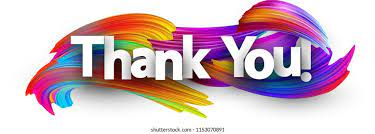